In [ ]:
import pandas as pd

#1.  Chargement des données
df = pd.read_csv("https://raw.githubusercontent.com/murpi/wilddata/master/pokemon.csv")


# Affichage des premières lignes
print(df.head())
print()
print()
# Informations sur les données
print(df.info())
print()
print()

# Statistiques descriptives
print(df.describe())
print()
print()
# Vérification des colonnes pertinentes
print(df.columns)

   #           Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0  1      Bulbasaur  Grass  Poison  45      49       49       65       65   
1  2        Ivysaur  Grass  Poison  60      62       63       80       80   
2  3       Venusaur  Grass  Poison  80      82       83      100      100   
3  4  Mega Venusaur  Grass  Poison  80     100      123      122      120   
4  5     Charmander   Fire     NaN  39      52       43       60       50   

   Speed  Generation  Legendary  
0     45           1      False  
1     60           1      False  
2     80           1      False  
3     80           1      False  
4     65           1      False  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-n

In [ ]:
# On voit que les colonnes pertinentes sont :
# Affiche toutes les lignes où la colonne Legendary est True
#legendary_pokemon = df[df['Legendary']]
#print(legendary_pokemon)
# colonne utile : HP, Attack, Defense, Sp. Atk, Sp. Def, Speed

In [ ]:
2.# PRéparation des donénes
#Sépartion des Pokémon légendaires et non légendaires
legendary = df[df['Legendary'] == True]
non_legendary = df[df['Legendary'] == False]

# On garde juste Sélection des colonnes pertinentes
columns = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
X = non_legendary[columns]


# Normalisation des données
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [ ]:
# 3. Implémentation de Nearest Neighbors
# on doit créez un modèle de NN et enairenez le sur les données( POKEMON NON LEGENDAIRE !!)
# choissir une valeur appropriée pour n_neighbors (soit k)

# import pour NN
from sklearn.neighbors import NearestNeighbors

#entrainement du modele sur les donénes normalsiées
k = 5 # on test dabord avec 5 puis on cahnge si besoin ...
model = NearestNeighbors(n_neighbors=k, metric='euclidean')
model.fit(X_scaled)



NearestNeighbors(metric='euclidean')

In [ ]:
# 4 Rechercche de Similarités
# on doit trouver les pokemons les plus proches des legendaires du dresseur .
# on doit s'assurer d'avoir uniquement les pokemeon non lgendaire .

# Liste des Pokémon légendaires du champion
champion_legendary = ['Mewtwo', 'Lugia', 'Rayquaza', 'Giratina', 'Dialga', 'Palkia']

# On fait une Fonction pour obtenir les recommandations
def get_recommendations(pokemon_name):
    # On recherche les Pokémon légendaire dans le dataset
    pokemon = legendary[legendary['Name'] == pokemon_name]
    if pokemon.empty:
        return "Pokémon non trouvé"

    # On extraits des caractéristiques
    features = pokemon[columns].values
    features_scaled = scaler.transform(features)

    # on recherche des voisins les plus proches
    distances, indices = model.kneighbors(features_scaled)

    # là on récupération des noms des Pokémon recommandés
    recommended_pokemon = non_legendary.iloc[indices[0]][['Name', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

    return recommended_pokemon

# Affichage des recommandations pour chaque Pokémon légendaire
for pokemon in champion_legendary:
    print(f"\nRecommandations pour {pokemon}:")
    recommendations = get_recommendations(pokemon)
    print(recommendations)


Recommandations pour Mewtwo:
                      Name  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
248          Mega Houndoom  75      90       90      140       90    115
23            Mega Pidgeot  83      80       80      135       80    121
696              Hydreigon  92     105       90      125       90     98
275          Mega Sceptile  70     110       75      145       85    145
713  Keldeo Ordinary Forme  91      72       90      129       90    108

Recommandations pour Lugia:
              Name   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
546      Cresselia  120      70      120       75      130     85
3    Mega Venusaur   80     100      123      122      120     80
548        Manaphy  100     100      100      100      100    100
271         Celebi  100     100      100      100      100    100
165            Mew  100     100      100      100      100    100

Recommandations pour Rayquaza:
                 Name   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
279   

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
(""" 6. Analyse et Interprétation
Discutez de la pertinence de vos recommandations.
Réfléchissez à l'impact du choix de k et des caractéristiques sélectionnées sur vos résultats.

les pokemon sen sortie correspondent bien aux pokemons légendaires du dresseur.( du moins j'ai essyayé...)

le k ==>Si k est trop petit, les résultats peuvent être trop restreints. Si k est trop grand, les résultats peuvent ne pas être assez similaires. Il faut essayer différentes valeurs de k pour voir l'effet.

Pour les caractéristiques,
 j'ai choisi les caractéristiques de base des Pokémon (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed).
 Ces caractéristiques sont les plus importantes pour déterminer la force d'un Pokémon.
   Si on choisit d'autres caractéristiques, les résultats peuvent être différents.
     Il faut essayer différentes combinaisons de caractéristiques pour voir l'effet.

""")


" 6. Analyse et Interprétation\nDiscutez de la pertinence de vos recommandations.\nRéfléchissez à l'impact du choix de k et des caractéristiques sélectionnées sur vos résultats.\n\nles pokemon sen sortie correspondent bien aux pokemons légendaires du dresseur.( du moins j'ai essyayé...)\n                                                                                \nle k ==>Si k est trop petit, les résultats peuvent être trop restreints. Si k est trop grand, les résultats peuvent ne pas être assez similaires. Il faut essayer différentes valeurs de k pour voir l'effet. \n\nPour les caractéristiques,\n j'ai choisi les caractéristiques de base des Pokémon (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed). \n Ces caractéristiques sont les plus importantes pour déterminer la force d'un Pokémon.\n   Si on choisit d'autres caractéristiques, les résultats peuvent être différents.\n     Il faut essayer différentes combinaisons de caractéristiques pour voir l'effet.\n\n"

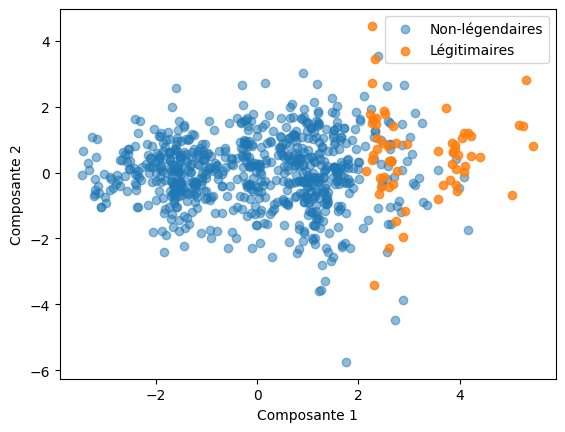

In [ ]:
# BONUS

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# On va réduite la dimensionnalité avec PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#on projette des Pokémon légendaires
legendary_features = legendary[columns]
legendary_features_scaled = scaler.transform(legendary_features)
legendary_pca = pca.transform(legendary_features_scaled)

# Visu
plt.scatter(X_pca[:, 0], X_pca[:, 1], label='Non-légendaires', alpha=0.5)
plt.scatter(legendary_pca[:, 0], legendary_pca[:, 1], label='Légitimaires', alpha=0.8)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
plt.legend()
plt.show()

In [ ]:
from sklearn.neighbors import NearestNeighbors
#SUR MEWTOO ( MON premier legendaire  :) )
# Données normalisées
X_scaled = scaler.fit_transform(X)

# Modèle avec la distance Euclidienne
model_euclidean = NearestNeighbors(n_neighbors=5, metric='euclidean').fit(X_scaled)

# Modèle avec la distance Manhattan
model_manhattan = NearestNeighbors(n_neighbors=5, metric='manhattan').fit(X_scaled)

# Fonction pour comparer les recommandations
def compare_metrics(pokemon_name, model1, model2, metric1, metric2):
    # Recherche du Pokémon légendaire
    pokemon = legendary[legendary['Name'] == pokemon_name]
    features = pokemon[columns].values
    features_scaled = scaler.transform(features)

    # Recherche des voisins pour chaque métrique
    distances_euclidean, indices_euclidean = model1.kneighbors(features_scaled)
    distances_manhattan, indices_manhattan = model2.kneighbors(features_scaled)

    # Récupération des noms
    recommended_euclidean = non_legendary.iloc[indices_euclidean[0]][['Name', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
    recommended_manhattan = non_legendary.iloc[indices_manhattan[0]][['Name', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

    print(f"\nRecommandations pour {pokemon_name} avec la métrique {metric1}:")
    print(recommended_euclidean)
    print(f"\nRecommandations pour {pokemon_name} avec la métrique {metric2}:")
    print(recommended_manhattan)

# Comparaison pour un Pokémon légendaire
compare_metrics('Mewtwo', model_euclidean, model_manhattan, 'Euclidienne', 'Manhattan')


Recommandations pour Mewtwo avec la métrique Euclidienne:
                      Name  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
248          Mega Houndoom  75      90       90      140       90    115
23            Mega Pidgeot  83      80       80      135       80    121
696              Hydreigon  92     105       90      125       90     98
275          Mega Sceptile  70     110       75      145       85    145
713  Keldeo Ordinary Forme  91      72       90      129       90    108

Recommandations pour Mewtwo avec la métrique Manhattan:
                      Name  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
696              Hydreigon  92     105       90      125       90     98
248          Mega Houndoom  75      90       90      140       90    115
275          Mega Sceptile  70     110       75      145       85    145
714  Keldeo Resolute Forme  91      72       90      129       90    108
713  Keldeo Ordinary Forme  91      72       90      129       90    108


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
